In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories

# 1: Crosstab Analysis: 
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(True, ascending=False)

crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [5]:
# Calculating the proportions for each True in crosstab_result table and rounding the results to four decimal places
# this will add a new column "Proportion" to the table.
proportion=crosstab_result['Proportion'] = (crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])).round(4)
proportion

category
Grocery                        0.0581
Health & Personal Care         0.0577
Baby                           0.0227
Sports & Outdoors              0.0004
Power & Hand Tools             0.0353
                                ...  
Downhill Ski Boots             0.0000
Digital Frames                 0.0000
Motorbike Chassis              0.0000
Motorbike Drive & Gears        0.0000
eBook Readers & Accessories    0.0000
Length: 296, dtype: float64

In [ ]:
# Are there categories where being a best-seller is more prevalent?
# Yes: Grocery, Health & Personal Care

In [6]:
# 2: Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value


(np.float64(36684.25740305412), np.float64(0.0))

In [ ]:
# chi-square test p-value= 0 < 0.05 
# If the p-value is extremely small (close to 0), it means the observed data would be very 
# unlikely under the assumption of independence, leading to the conclusion that the variables are not independent
# (i.e. they are associated/dependent). Rejection of null hypothesis.

In [7]:
crosstab_result.drop(columns=["Proportion"],inplace=True) 
# Dropped the additional column created above. Original dataframe modified with inplace=True


In [8]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.12228294397605641

In [ ]:
# 0.12 Cramer's V indicates a weak association between category and the likelihood of being a best seller.

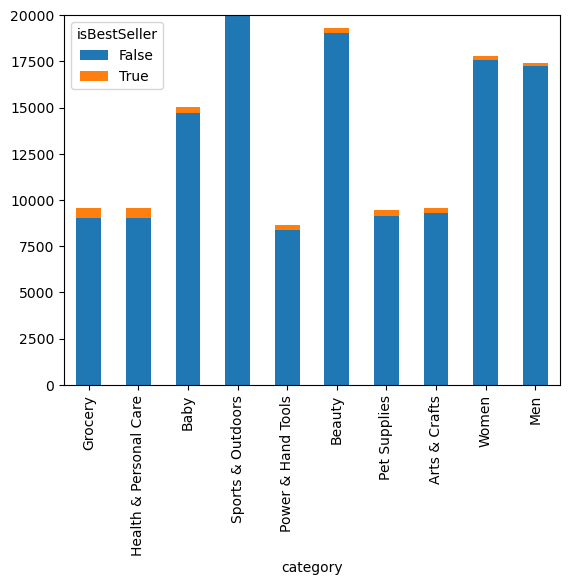

In [10]:
# 3: Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
top10=crosstab_result.head(10)
top10.plot(kind="bar", stacked=True)
y="count"
x="category"
plt.ylim(0, 20000)
plt.show() 

In [ ]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [11]:
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
min_price, max_price, range_price, quantiles_price

(0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [14]:
Q1 = df['price'].quantile(0.25)  # 25th percentile (Q1)
Q3 = df['price'].quantile(0.75)  # 75th percentile (Q3)
IQR = Q3 - Q1

In [15]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


In [ ]:
# filtering out the outliers

In [18]:
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
# top20 categories by count

In [19]:
frequency_table = df_filtered['category'].value_counts()
top20=frequency_table.head(20)
top20

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

In [ ]:
# Use a violin plot to visualize the distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_44804/2660338177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top, x='category', y='price', palette="coolwarm")


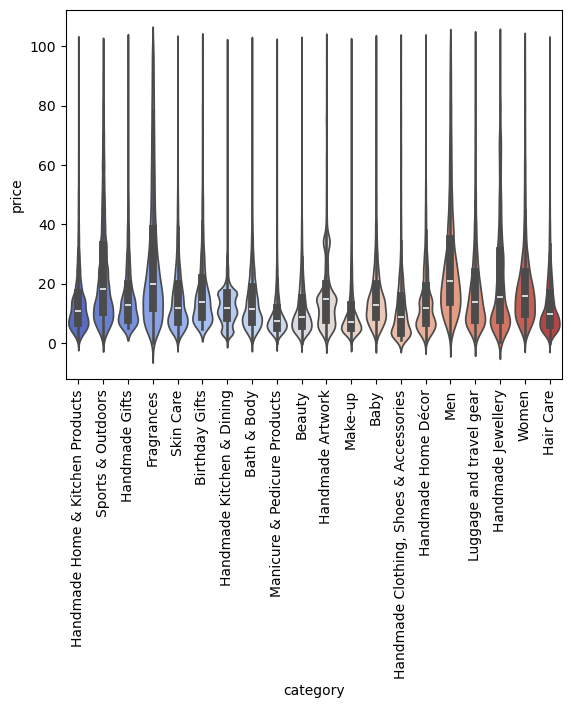

In [20]:
top20= df_filtered['category'].value_counts().head(20).index #names of the top 20 categories
df_top = df_filtered[df_filtered['category'].isin(top20)] #only keeping the rows where the column category is in the list of top20 categories.
sns.violinplot(data=df_top, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Which product category tends to have the highest median price? Don't filter here by top categories.

In [21]:
median_prices = df_top.groupby('category')['price'].median()

In [22]:
highest_median_value = median_prices.max()
highest_median_category = median_prices.idxmax()
print (highest_median_value, highest_median_category) 

20.99 Men


In [ ]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

In [23]:
top10=frequency_table.head(10).index

In [25]:
top10_df = df_top[df_top['category'].isin(top10)]

# 3. Calculate average price for each top product
avg_prices = top10_df.groupby('category')['price'].mean().sort_values(ascending=False)

In [26]:
avg_prices

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_44804/268672068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="Set3")


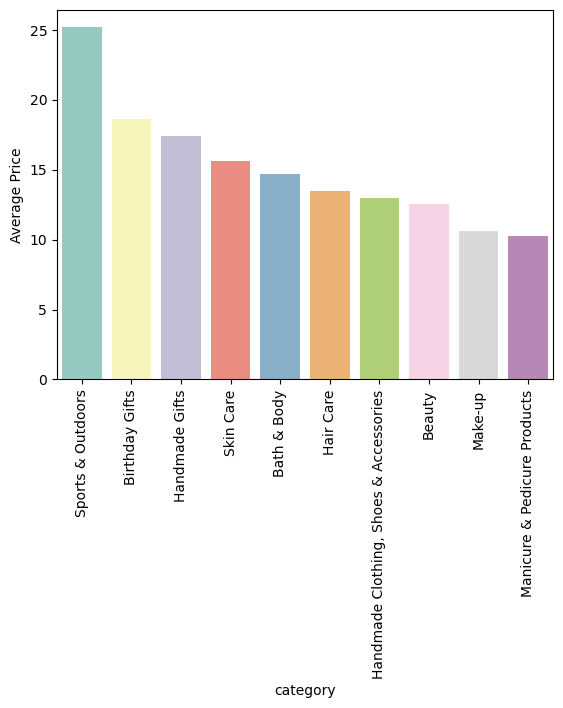

In [27]:
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="Set3")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.show();

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_44804/3033132732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df_top10, x='category', y='stars', palette="coolwarm")


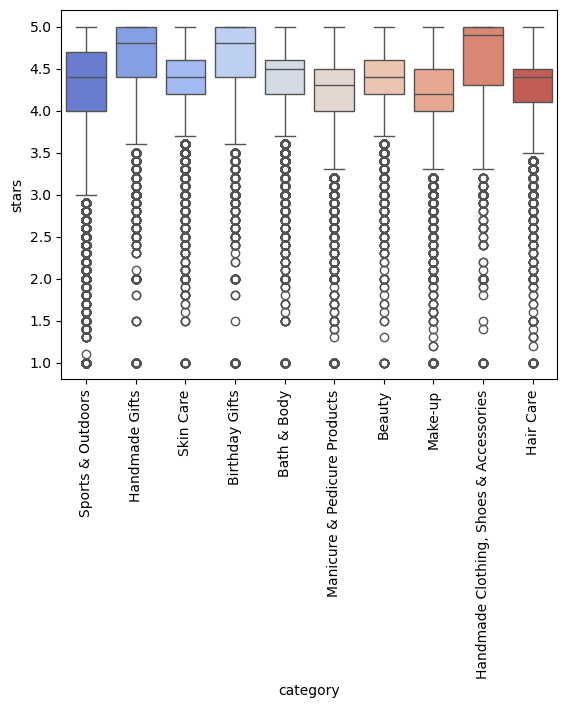

In [28]:
filtered_df_top10 = top10_df[top10_df['stars'] != 0]
#top10_df2 = filtered_df_top10[df['category'].isin(top10)]

sns.boxplot(data=filtered_df_top10, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [33]:
filtered_df_top10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2397634,2767899,B000HGPG3S,Marmot Marmot Ladies' Tempo Vest - ATOMIC BLUE...,4.0,1,71.65,False,0,Sports & Outdoors
2397652,2767930,B00DZO0K5I,Trespass Girl's Vee Jacket,4.4,37,26.38,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [34]:
median_stars = filtered_df_top10.groupby('category')['stars'].median()
highest_median_value = median_stars.max()
highest_median_category = median_stars.idxmax()
print (highest_median_value, highest_median_category) 

4.9 Handmade Clothing, Shoes & Accessories


In [ ]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
# Calculating the Pearson correlation coefficient 

In [37]:
from scipy.stats import pearsonr, spearmanr
correlation, p_value = pearsonr(filtered_df_top10['price'], filtered_df_top10['stars'])
correlation, p_value

(np.float64(0.05579976466616267), np.float64(5.580667541422012e-175))

In [ ]:
#p-value<0.05 -> variables are not independent of each other. Very weak significant correlation between price and stars.

In [38]:
# Calculating the Spearman rank correlation 
correlation, p_value = spearmanr(filtered_df_top10['price'], filtered_df_top10['stars'])
correlation, p_value

(np.float64(0.11377696837794736), np.float64(0.0))

In [ ]:
#p-value<0.05 -> variables are not independent of each other. Very weak significant correlation between price and stars.

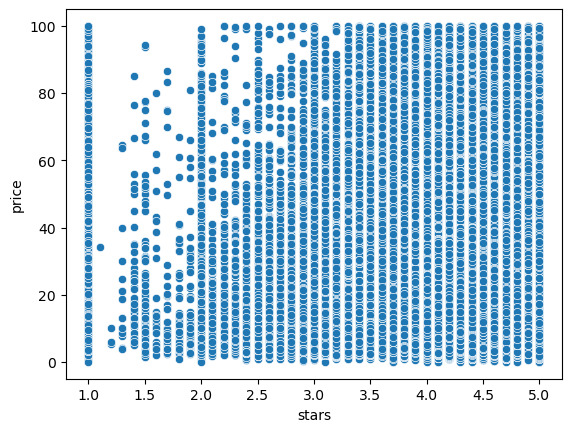

In [42]:
sns.scatterplot(data=filtered_df_top10, x='stars', y='price')
plt.show()

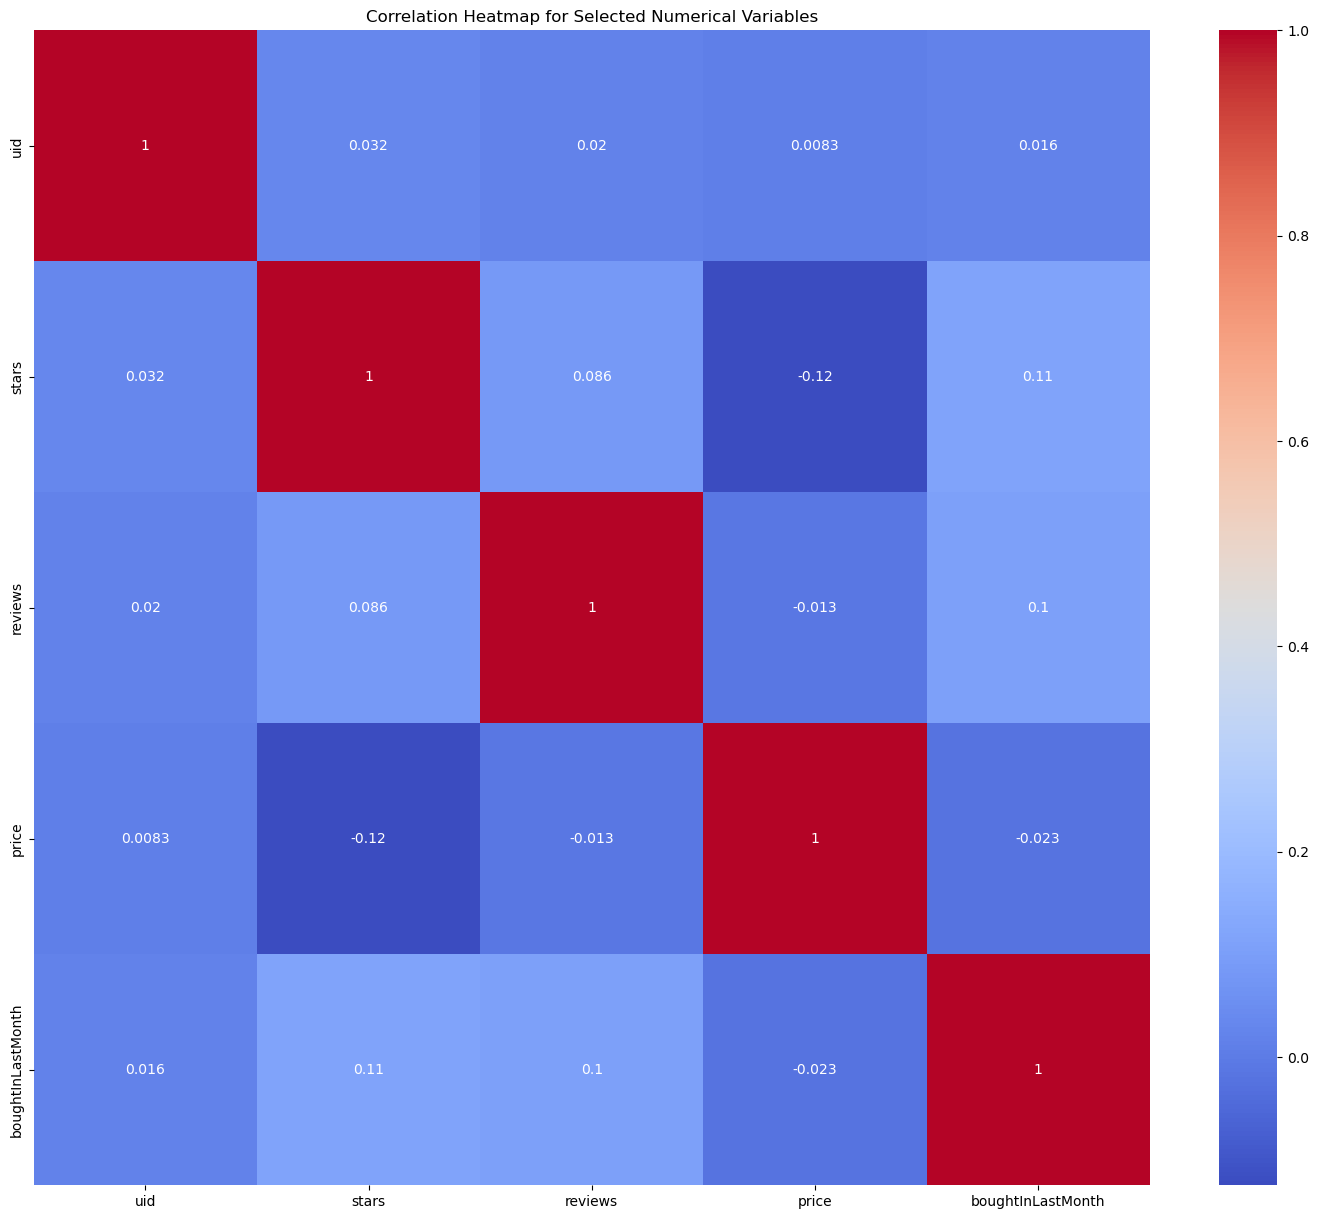

In [43]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [44]:
import statsmodels.api as sm

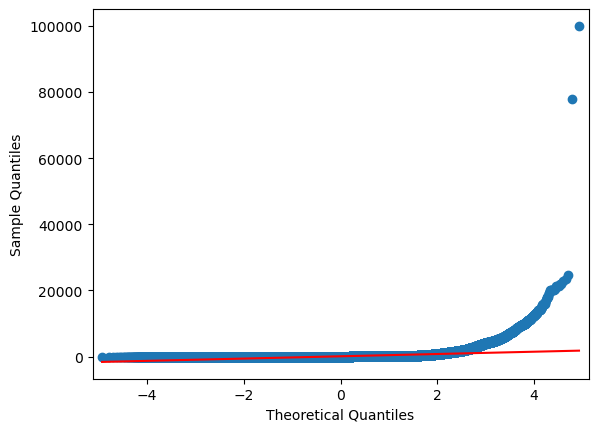

In [45]:
sm.qqplot(df['price'],line='s')